In [7]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix


In [11]:
data_dir='C:\\Users\\visha\\TEA\\teasickness'

In [12]:

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 711 images belonging to 8 classes.
Found 174 images belonging to 8 classes.


In [13]:
batch_size=32

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense



In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(8, activation='softmax'))



In [16]:
from tensorflow.keras.utils import plot_model

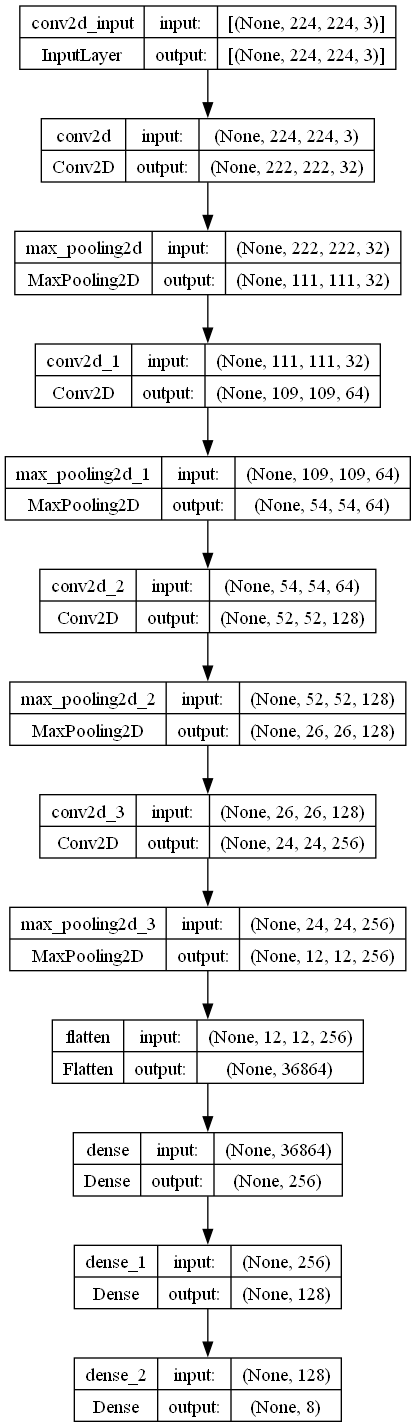

In [17]:

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [18]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







In [19]:

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [20]:

history = model.fit(
    train_data,
    epochs=50,
    batch_size=batch_size,
    validation_data=val_data
)

Epoch 1/50


23/23 [==============================] - 180s 8s/step - loss: 2.0722 - accuracy: 0.2166 - val_loss: 1.6421 - val_accuracy: 0.2586
Epoch 2/50
23/23 [==============================] - 156s 7s/step - loss: 1.5592 - accuracy: 0.3066 - val_loss: 1.3788 - val_accuracy: 0.3391
Epoch 3/50
23/23 [==============================] - 226s 10s/step - loss: 1.3182 - accuracy: 0.3347 - val_loss: 1.2232 - val_accuracy: 0.3621
Epoch 4/50
23/23 [==============================] - 192s 8s/step - loss: 1.1795 - accuracy: 0.4107 - val_loss: 1.5467 - val_accuracy: 0.2874
Epoch 5/50
23/23 [==============================] - 233s 10s/step - loss: 1.1542 - accuracy: 0.4402 - val_loss: 1.1535 - val_accuracy: 0.4310
Epoch 6/50
23/23 [==============================] - 258s 11s/step - loss: 1.1040 - accuracy: 0.4374 - val_loss: 1.2629 - val_accuracy: 0.3621
Epoch 7/50
23/23 [==============================] - 442s 19s/step - loss: 1.0982 - accuracy: 0.4543 - val_loss: 1.1642 - val_accuracy: 0.4195
Epoch 8

In [21]:
import matplotlib.pyplot as plt

def plot_loss(history):
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()

def plot_accuracy(history):
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='lower right')
    plt.show()



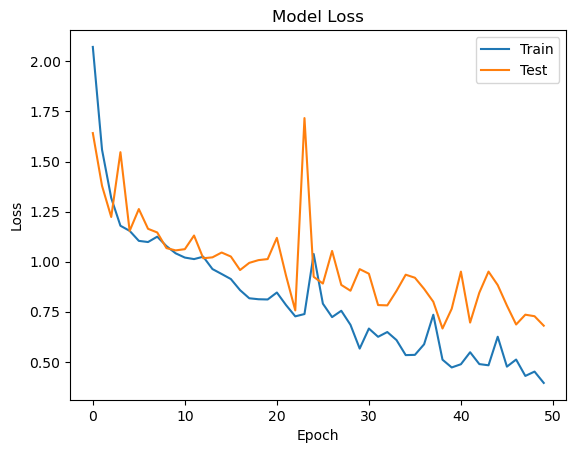

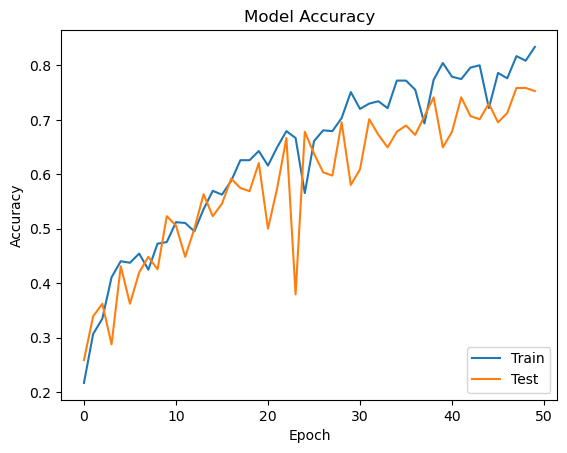

In [22]:
plot_loss(history)
plot_accuracy(history)

In [23]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.6)

test_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size= 32,
    shuffle=True,
    class_mode='categorical',
    subset='validation')

Found 528 images belonging to 8 classes.


In [24]:

loss, accuracy = model.evaluate(test_data)

print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

17/17 [==============================] - 200s 12s/step - loss: 0.4965 - accuracy: 0.8049
Test Loss: 0.4964892566204071
Test Accuracy: 0.8049242496490479


In [25]:

true_labels = test_data.classes
predicted_labels = model.predict(test_data)
predicted_labels = np.argmax(predicted_labels, axis=1)



17/17 [==============================] - 206s 12s/step


In [26]:

print(classification_report(true_labels, predicted_labels))



              precision    recall  f1-score   support

           0       0.13      0.13      0.13        60
           1       0.13      0.12      0.12        67
           2       0.11      0.13      0.12        60
           3       0.09      0.09      0.09        67
           4       0.16      0.12      0.13        60
           5       0.12      0.11      0.11        44
           6       0.16      0.19      0.17        85
           7       0.14      0.13      0.14        85

    accuracy                           0.13       528
   macro avg       0.13      0.13      0.13       528
weighted avg       0.13      0.13      0.13       528



In [27]:

cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 8  4  6  8  5  5 18  6]
 [ 8  8  8 11  5  6 13  8]
 [ 5 12  8  4  5  7 12  7]
 [ 8  9 13  6  7  1 13 10]
 [ 5  8 10  6  7  4 11  9]
 [ 7  4  4  5  1  5  5 13]
 [12 10  9 12  8  5 16 13]
 [ 9  6 15 15  7 10 12 11]]


In [28]:
import matplotlib.pyplot as plt


In [29]:

num_images = 5
test_images, test_labels = next(test_data)



In [30]:

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)



1/1 [==============================] - 1s 1s/step


In [31]:

class_names = list(test_data.class_indices.keys())
true_labels = np.argmax(test_labels, axis=1)
true_class_names = [class_names[label] for label in true_labels]
predicted_class_names = [class_names[label] for label in predicted_labels]



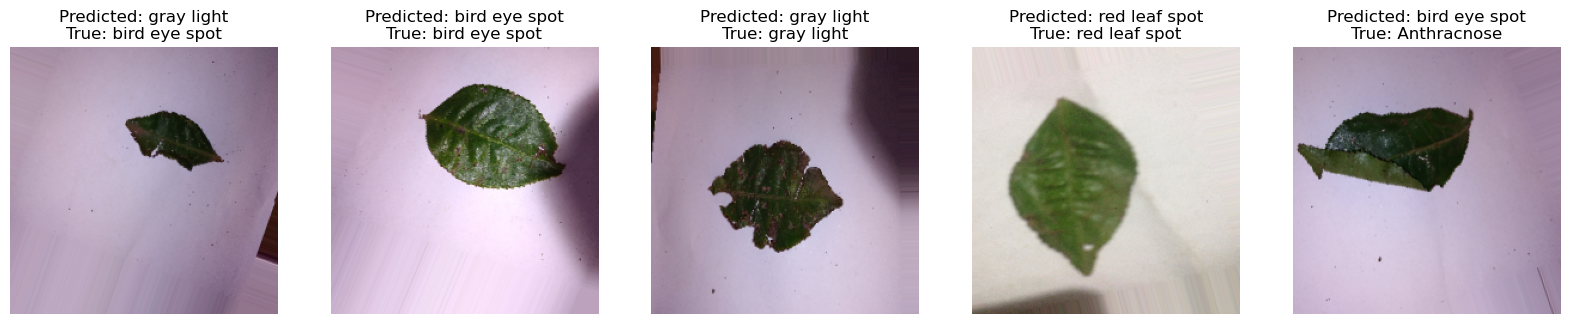

In [32]:

fig, axes = plt.subplots(1, num_images, figsize=(20, 5))

for i, ax in enumerate(axes):
    ax.imshow(test_images[i])
    ax.axis('off')
    ax.set_title(f"Predicted: {predicted_class_names[i]}\nTrue: {true_class_names[i]}")

plt.show()

In [34]:
model.save("C:\\Users\\visha")

INFO:tensorflow:Assets written to: C:\Users\visha\assets


INFO:tensorflow:Assets written to: C:\Users\visha\assets
